### Topic: Predict the number of Confirmed cases in 20 days

In [214]:
# important packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# models
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
# data processing / metric
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, log_loss, accuracy_score
plt.style.use('fivethirtyeight')

In [2]:
# read in & seperate Confirmed , Deaths , Recovers cases

world_confirmed_df = pd.read_csv('~/Desktop/csci/4622/covid-19/time_series_covid_19_confirmed.csv')
world_deaths_df = pd.read_csv('~/Desktop/csci/4622/covid-19/time_series_covid_19_deaths.csv')
world_recovered_df = pd.read_csv('~/Desktop/csci/4622/covid-19/time_series_covid_19_recovered.csv')


In [3]:
world_confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,996,1026,1092,1176,1279,1351,1463,1531,1703,1828
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,562,584,609,634,663,678,712,726,736,750
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,713,717,717,723,723,731,738,738,743,743
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,24,24,25,25,25,25,26,27,27


In [4]:
world_deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,33,36,36,40,42,43,47,50,57,58
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,26,26,26,27,27,27,27,28,28,30
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,375,384,392,402,407,415,419,425,432,437
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,36,37,37,37,37,40,40,40,40,41
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [5]:
world_recovered_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,131,135,150,166,179,188,188,207,220,228
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,314,327,345,356,385,394,403,410,422,431
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1047,1099,1152,1204,1355,1408,1479,1508,1558,1651
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,235,248,282,309,333,344,344,344,385,398
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6


In [6]:
# get the latest date information of covid-19
world_confirmed_df.keys()
# 4/28/20
# date starts at loc[4:-1] in df
# initial date = 1/22/20

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '4/19/20', '4/20/20', '4/21/20', '4/22/20', '4/23/20', '4/24/20',
       '4/25/20', '4/26/20', '4/27/20', '4/28/20'],
      dtype='object', length=102)

In [7]:
# get all dates
unclean_title = world_confirmed_df.keys()

dates_confirmed = world_confirmed_df.loc[:, unclean_title[4]:unclean_title[-1]]
dates_deaths = world_deaths_df.loc[:, unclean_title[4]:unclean_title[-1]]
dates_recovered = world_recovered_df.loc[:, unclean_title[4]:unclean_title[-1]]


In [8]:
# data checking:
dates_confirmed.isnull().any().tolist()
# dates_deaths.isnull().any()
# dates_recovered.isnull().any()
# dates_confirmed

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [9]:
clean_dates = dates_confirmed.keys()

world_confirmed = []
world_deaths    = []
world_recovered = []

recover_rate    = []
death_rate      = []


In [10]:
for i in clean_dates:
    tot_c = np.sum(dates_confirmed[i])
    tot_d = np.sum(dates_deaths[i])
    tot_r = np.sum(dates_recovered[i])
    
    world_confirmed.append(tot_c)
    world_deaths.append(tot_d)
    world_recovered.append(tot_r)
    
    # calculate the rate for deaths and recovers
    recover_rate.append(float(tot_d / tot_c))
    death_rate.append(float(tot_r / tot_c))
    

In [11]:
# compute the daily increase around the world

def daily_increase(case):
    temp = []
    for i in range(len(case)):
        temp.append(case[0] if i == 0 else case[i]-case[i-1])
    return temp

daily_confirmed = daily_increase(world_confirmed)
daily_deaths = daily_increase(world_deaths)
daily_recovered = daily_increase(world_recovered)


In [12]:
# convert all list into 1-col np.array
dates_since_1_22 = np.array([i for i in range(len(clean_dates))]).reshape(-1, 1)
world_confirmed = np.array(world_confirmed).reshape(-1, 1)
world_deaths = np.array(world_deaths).reshape(-1, 1)
world_recovered = np.array(world_recovered).reshape(-1, 1)


In [13]:
# general information visulizations
dates = dates_since_1_22.reshape(1, -1)[0]

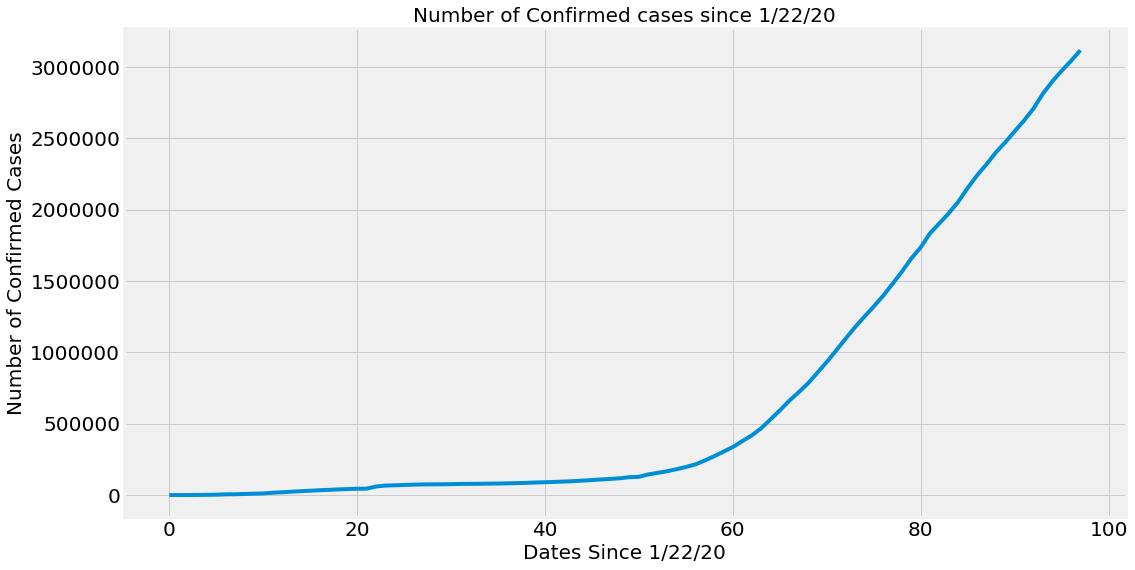

In [14]:
# world-wide confirmed cases curve
plt.figure(figsize=(16, 9))
plt.plot(dates, world_confirmed)
plt.title('Number of Confirmed cases since 1/22/20', size=20)
plt.xlabel('Dates Since 1/22/20', size=20)
plt.ylabel('Number of Confirmed Cases', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

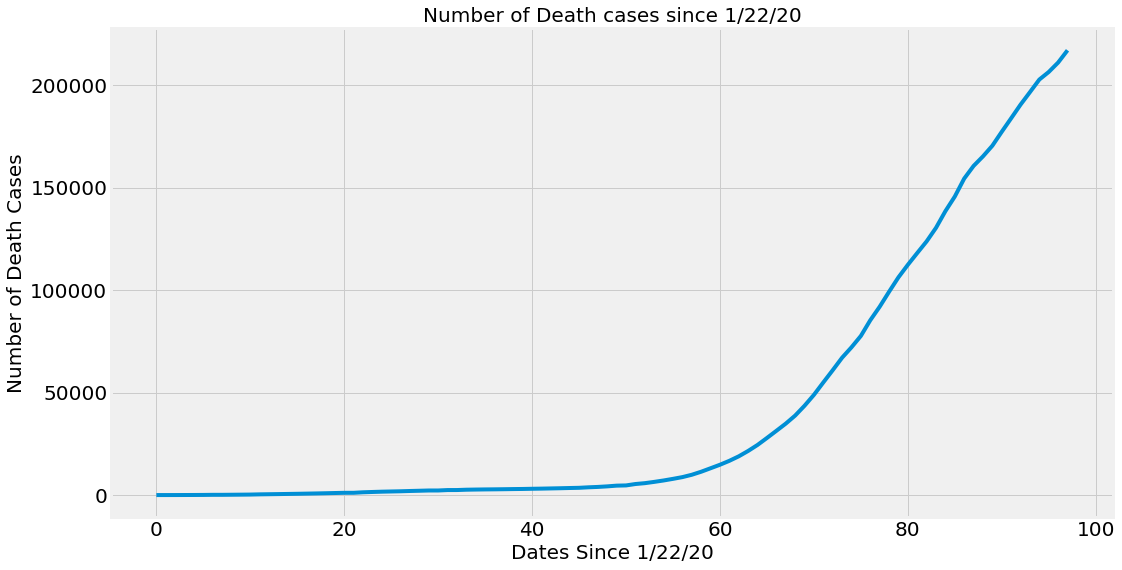

In [15]:
# world-wide deaths cases curve
plt.figure(figsize=(16, 9))
plt.plot(dates, world_deaths)
plt.title('Number of Death cases since 1/22/20', size=20)
plt.xlabel('Dates Since 1/22/20', size=20)
plt.ylabel('Number of Death Cases', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

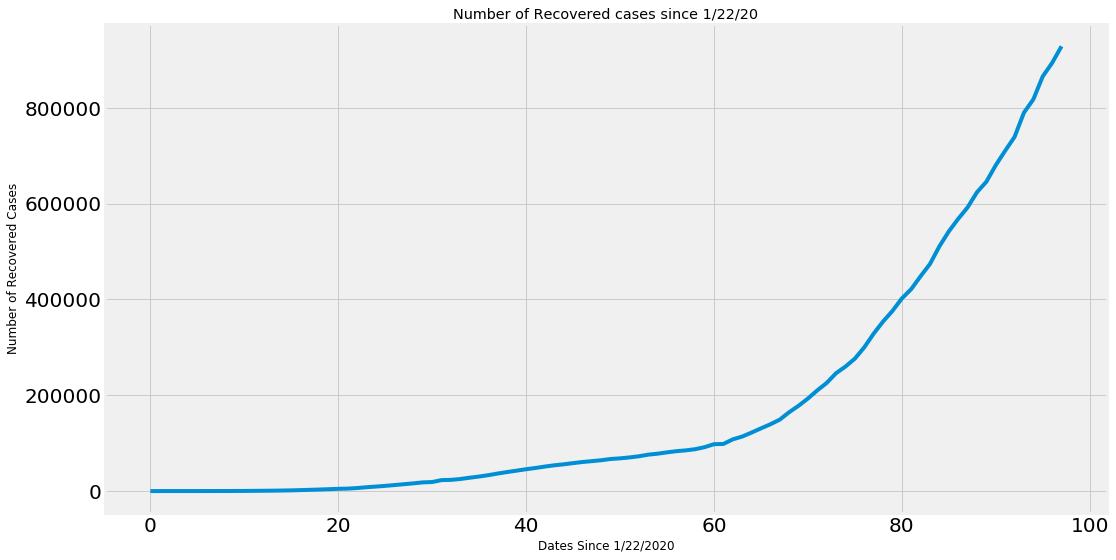

In [16]:
# world-wide recovered cases curve
plt.figure(figsize=(16, 9))
plt.plot(dates, world_recovered)
plt.title('Number of Recovered cases since 1/22/20')
plt.xlabel('Dates Since 1/22/2020')
plt.ylabel('Number of Recovered Cases')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

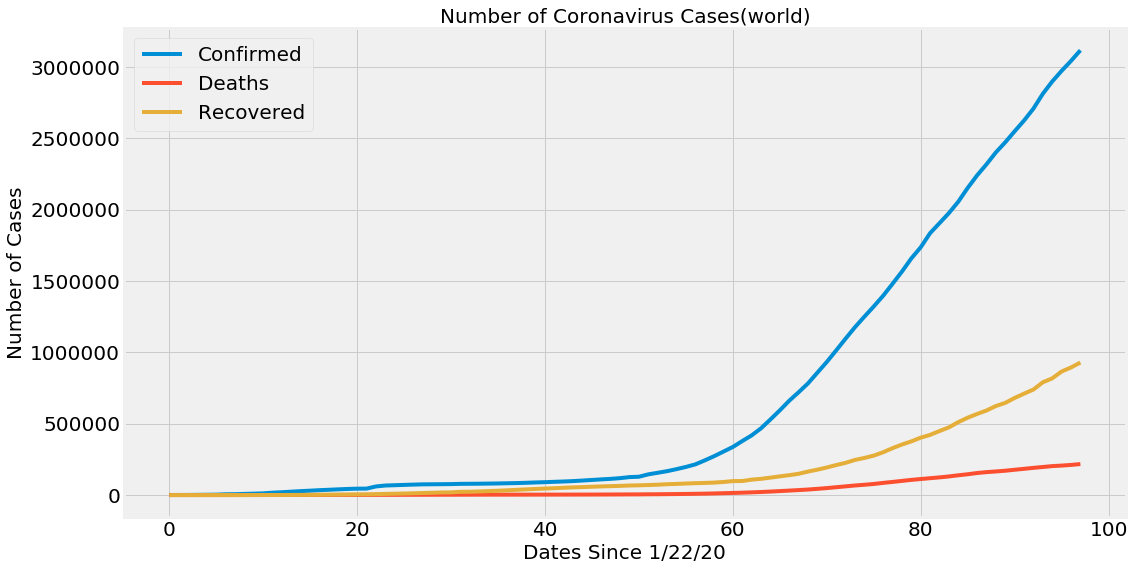

In [17]:
# Let's see the trend among these 3 types of case
plt.figure(figsize=(16, 9))
plt.plot(dates, world_confirmed)
plt.plot(dates, world_deaths)
plt.plot(dates, world_recovered)
plt.title('Number of Coronavirus Cases(world)', size=20)
plt.xlabel('Dates Since 1/22/20', size=20)
plt.ylabel('Number of Cases', size=20)
plt.legend(['Confirmed', 'Deaths', 'Recovered'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [18]:
future = 20
pred_future = np.array([i for i in range(len(clean_dates) + future)]).reshape(-1, 1)

In [37]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(dates_since_1_22, \
                                                            world_confirmed,test_size=.3, \
                                                            shuffle=False)

In [78]:
# shape data for polynomial regression
poly = PolynomialFeatures(degree=3)
poly_X_train_c = poly.fit_transform(X_train_c)
poly_X_test_c = poly.fit_transform(X_test_c)
poly_pred_future = poly.fit_transform(pred_future)

In [184]:
# polynomial linear regression
linear_model = LinearRegression(normalize=True)
linear_model.fit(poly_X_train_c, y_train_c)
test_linear_pred = linear_model.predict(poly_X_test_c)

poly_pred = linear_model.predict(poly_pred_future)

print('Polynomial Regression MAE:', mean_absolute_error(test_linear_pred, y_test_c))
print('Polynomial Regression MSE:',mean_squared_error(test_linear_pred, y_test_c))

Polynomial Regression MAE: 208887.2224367045
Polynomial Regression MSE: 51711011682.710304


In [185]:
ss = StandardScaler()
x_train = ss.fit_transform(X_train_c)
x_test = ss.transform(X_test_c)
y_train = ss.fit_transform(y_train_c)
y_test = ss.transform(y_test_c)

# SVR
svr = SVR(shrinking=True, kernel='poly', gamma=.01, epsilon=.01, degree=4, C=.1)
svr.fit(X_train_c, y_train_c)
svr_hat = svr.predict(X_test_c)

svr_pred = svr.predict(pred_future)

print('SVR MAE:\t', mean_absolute_error(svr_hat, y_test_c))
print('SVR MSE:\t',mean_squared_error(svr_hat, y_test_c))

# --------------- Bad models for covid-19 predicting -----------------------------------------
# # linear regression
# LR = LinearRegression(normalize=True, n_jobs=-1)
# LR.fit(x_train, y_train)
# y_hat_c = LR.predict(x_test)

# linear_pred = LR.predict(pred_future)

# print('Linear MAE:\t', mean_absolute_error(y_hat_c, y_test))
# print('Linear MSE:\t',mean_squared_error(y_hat_c, y_test))

# # SGD regressor
# sgd = SGDRegressor()
# sgd.fit(x_train, y_train)
# sgd_hat = sgd.predict(x_test)

# sgd_pred = sgd.predict(pred_future)
# sgd_pred = ss.inverse_transform(sgd_pred)

# print('SGD MAE:\t', mean_absolute_error(sgd_hat, y_test))
# print('SGD MSE:\t',mean_squared_error(sgd_hat, y_test))

# Ridge regression
ridge = Ridge(alpha=.1)
ridge.fit(X_train_c, y_train_c)
ridge_hat = ridge.predict(X_test_c)

ridge_pred = ridge.predict(pred_future)

print('Ridge MAE:\t', mean_absolute_error(ridge_hat, y_test_c))
print('Ridge MSE:\t',mean_squared_error(ridge_hat, y_test_c))
# ------------------------------------------------------------------------------------------

SVR MAE:	 735253.7842107755
SVR MSE:	 597214571675.3357
Ridge MAE:	 1494337.1490327208
Ridge MSE:	 2652832029360.7007


C:\Users\Kobayashi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [186]:
# poly_pred
# linear_pred
# svr_pred
# ridge_pred

def show_predict(x, y, pred, model, color):
    plt.figure(figsize=(16, 9))
    plt.plot(x, y)
    plt.plot(pred_future, pred, linestyle='dashed', color=color)
    plt.title('Number of Coronavirus Cases since 1/22/20', size=20)
    plt.xlabel('Dates Since 1/22/2020', size=20)
    plt.ylabel('Number of Cases', size=20)
    plt.legend(['Confirmed Cases', model], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

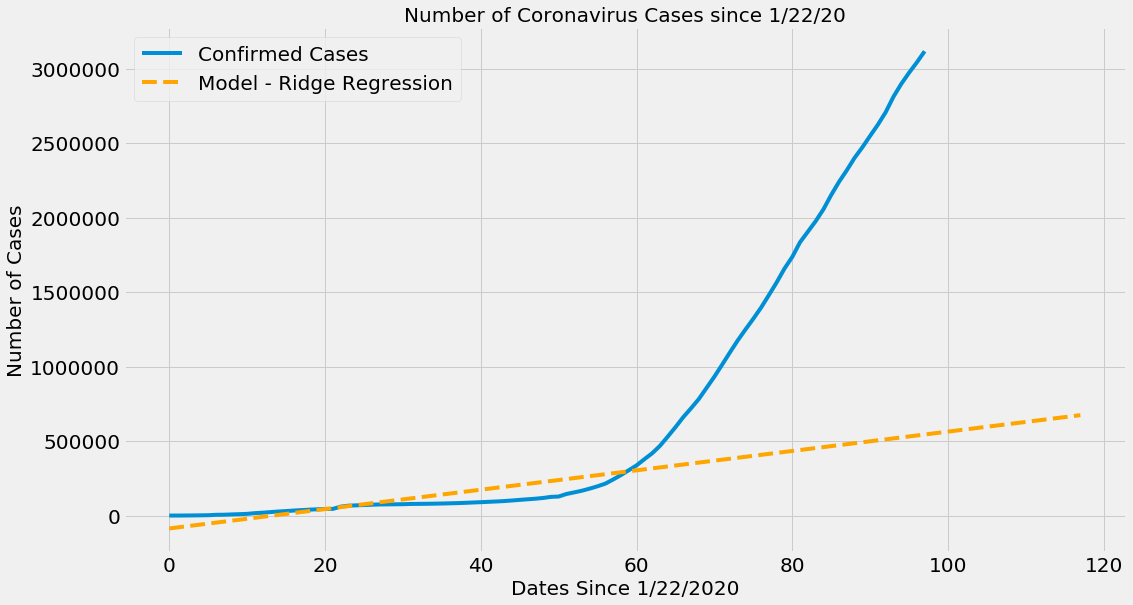

In [187]:
show_predict(dates_since_1_22, world_confirmed, ridge_pred, 'Model - Ridge Regression', 'orange')

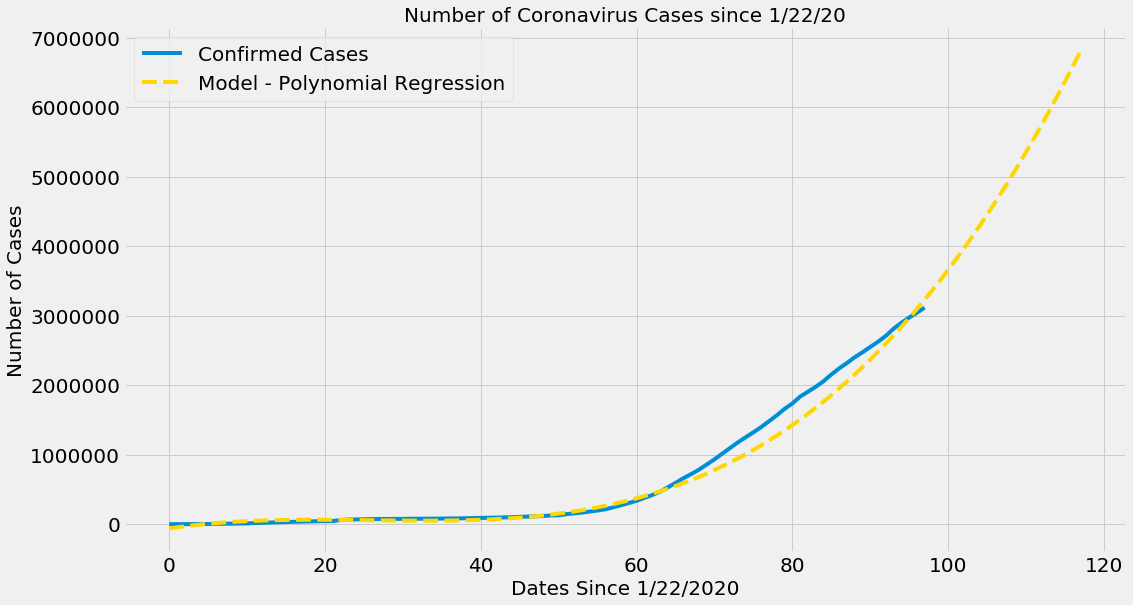

In [126]:
show_predict(dates_since_1_22, world_confirmed, poly_pred, 'Model - Polynomial Regression', 'gold')

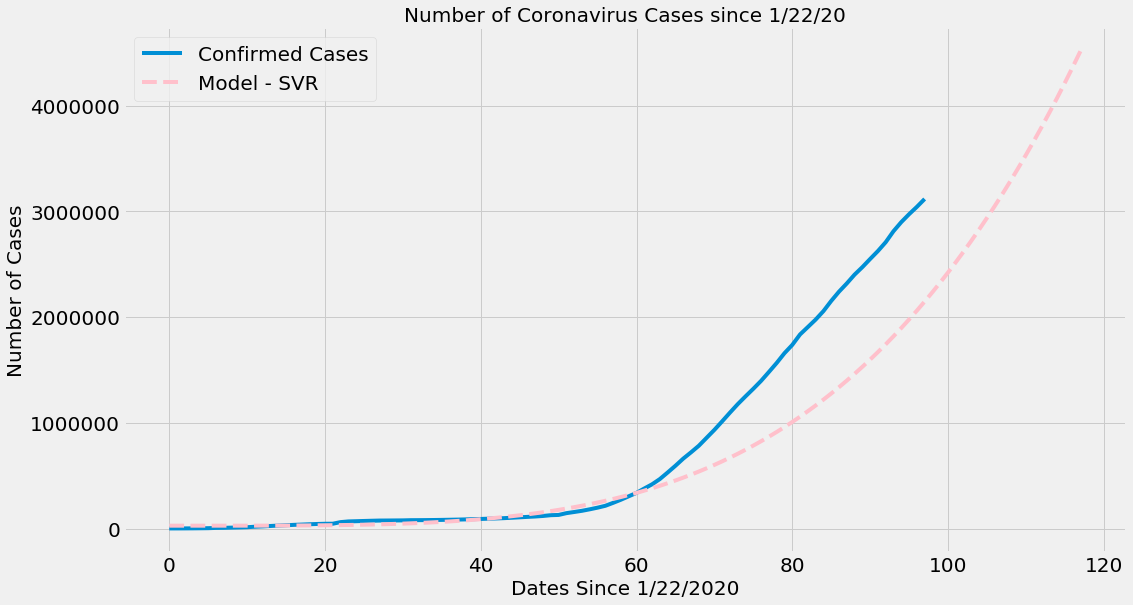

In [129]:
show_predict(dates_since_1_22, world_confirmed, svr_pred, 'Model - SVR', 'pink')

In [190]:
future_dates = np.array(['4/29/20', '4/30/20', '5/1/20', '5/2/20', '5/3/20', '5/4/20', '5/5/20', '5/6/20',
                '5/7/20', '5/8/20', '5/9/20', '5/10/20', '5/11/20', '5/12/20', '5/13/20', '5/14/20',
                '5/15/20', '5/16/20', '5/17/20', '5/18/20'])

In [153]:
# output each predictions for the future 20 days

svr_df = pd.DataFrame({'Date': future_dates[:], \
                       'SVR Predicted Number of Confirmed Cases': np.round(svr_pred[-20:])})
svr_df

,Date,SVR Predicted Number of Confirmed Cases
0,4/29/20,2235151.0
1,4/30/20,2326680.0
2,5/1/20,2421025.0
3,5/2/20,2518244.0
4,5/3/20,2618394.0
5,5/4/20,2721532.0
6,5/5/20,2827720.0
7,5/6/20,2937014.0
8,5/7/20,3049477.0
9,5/8/20,3165167.0


In [166]:
podf = poly_pred.reshape(118,)
poly_df = pd.DataFrame({'Date': future_dates[:], \
                        'Polynomial Reg Predicted Number of Confirmed Cases': np.round(podf[-20:])})
poly_df

,Date,Polynomial Reg Predicted Number of Confirmed Cases
0,4/29/20,3368579.0
1,4/30/20,3510842.0
2,5/1/20,3657081.0
3,5/2/20,3807352.0
4,5/3/20,3961707.0
5,5/4/20,4120202.0
6,5/5/20,4282891.0
7,5/6/20,4449827.0
8,5/7/20,4621067.0
9,5/8/20,4796662.0


In [191]:
rd = ridge_pred.reshape(118,)
ridge_df = pd.DataFrame({'Date': future_dates[:], 'Ridge Regression Predicted Number': np.round(rd[-20:])})
ridge_df

,Date,Ridge Regression Predicted Number
0,4/29/20,551021.0
1,4/30/20,557520.0
2,5/1/20,564019.0
3,5/2/20,570517.0
4,5/3/20,577016.0
5,5/4/20,583515.0
6,5/5/20,590014.0
7,5/6/20,596513.0
8,5/7/20,603011.0
9,5/8/20,609510.0


### Choose SVR as study model

In [192]:
# Let's look inside 3 countries : China, US and Canada

countrys = world_confirmed_df['Country/Region'].unique()
key = world_confirmed_df.keys()
date = key[4:]
A = {}
for i in countrys:
    for j in date:
        temp = world_confirmed_df[world_confirmed_df['Country/Region']==i][j].sum()
    A[i] = temp
from collections import Counter 
k = Counter(A) 
# Finding 3 highest values
high = k.most_common(10)
print("Dictionary with 10 highest values:") 
print("Country: Confirmed number") 
for i in high:
    print(i[0]," :",i[1]," ")

Dictionary with 10 highest values:
Country: Confirmed number
US  : 1012582  
Spain  : 232128  
Italy  : 201505  
France  : 169053  
United Kingdom  : 162350  
Germany  : 159912  
Turkey  : 114653  
Russia  : 93558  
Iran  : 92584  
China  : 83940  


In [193]:
# -------------------------- confirmed cases --------------------------------------------------
US_confirme = [] 
Spain_confirme = [] 
Italy_confirme = []
France_confirme = [] 
UK_confirme = [] 
China_confirme = [] 
Canada_confirme = []

for i in date:
    US_confirme.append(world_confirmed_df[world_confirmed_df['Country/Region']=='US'][i].sum())
    Spain_confirme.append(world_confirmed_df[world_confirmed_df['Country/Region']=='Spain'][i].sum())
    Italy_confirme.append(world_confirmed_df[world_confirmed_df['Country/Region']=='Italy'][i].sum())
    France_confirme.append(world_confirmed_df[world_confirmed_df['Country/Region']=='France'][i].sum())
    UK_confirme.append(world_confirmed_df[world_confirmed_df['Country/Region']=='United Kingdom'][i].sum())
    China_confirme.append(world_confirmed_df[world_confirmed_df['Country/Region']=='China'][i].sum())
    Canada_confirme.append(world_confirmed_df[world_confirmed_df['Country/Region']=='Canada'][i].sum())
# -------------------------- confirmed cases --------------------------------------------------
# --------------------------  deaths  cases  --------------------------------------------------
US_death = [] 
Spain_death = [] 
Italy_death = []
France_death = [] 
UK_death = [] 
China_death = []
Canada_death = []

for i in date:
    US_death.append(world_deaths_df[world_deaths_df['Country/Region']=='US'][i].sum())
    Spain_death.append(world_deaths_df[world_deaths_df['Country/Region']=='Spain'][i].sum())
    Italy_death.append(world_deaths_df[world_deaths_df['Country/Region']=='Italy'][i].sum())
    France_death.append(world_deaths_df[world_deaths_df['Country/Region']=='France'][i].sum())
    UK_death.append(world_deaths_df[world_deaths_df['Country/Region']=='United Kingdom'][i].sum())
    China_death.append(world_deaths_df[world_deaths_df['Country/Region']=='China'][i].sum())
    Canada_death.append(world_deaths_df[world_deaths_df['Country/Region']=='Canada'][i].sum())
# --------------------------  deaths  cases  --------------------------------------------------
# -------------------------- recovered cases --------------------------------------------------
US_recovered = [] 
Spain_recovered = [] 
Italy_recovered = []
France_recovered = [] 
UK_recovered = [] 
China_recovered = []
Canada_recovered = []

for i in date:
    US_recovered.append(world_recovered_df[world_recovered_df['Country/Region']=='US'][i].sum())
    Spain_recovered.append(world_recovered_df[world_recovered_df['Country/Region']=='Spain'][i].sum())
    Italy_recovered.append(world_recovered_df[world_recovered_df['Country/Region']=='Italy'][i].sum())
    France_recovered.append(world_recovered_df[world_recovered_df['Country/Region']=='France'][i].sum())
    UK_recovered.append(world_recovered_df[world_recovered_df['Country/Region']=='United Kingdom'][i].sum())
    China_recovered.append(world_recovered_df[world_recovered_df['Country/Region']=='China'][i].sum())
    Canada_recovered.append(world_recovered_df[world_recovered_df['Country/Region']=='Canada'][i].sum())
# -------------------------- recovered cases --------------------------------------------------

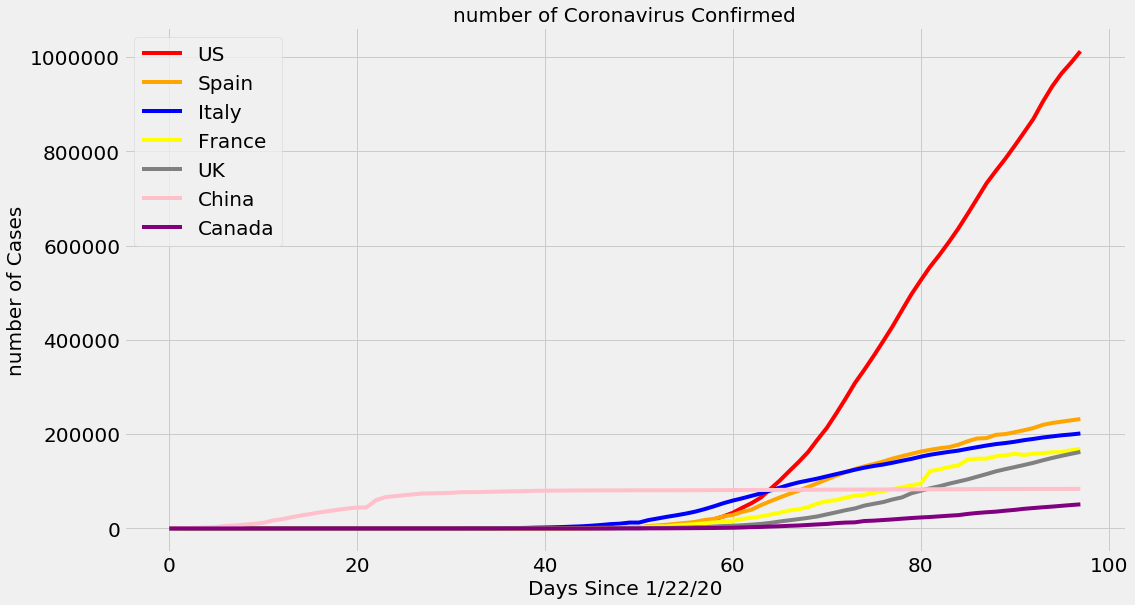

In [196]:
plt.figure(figsize=(16, 9))
plt.plot(dates, US_confirme,color = "red")
plt.plot(dates, Spain_confirme,color = "orange")
plt.plot(dates, Italy_confirme,color = "blue")
plt.plot(dates, France_confirme,color = "yellow")
plt.plot(dates, UK_confirme,color = "gray")
plt.plot(dates, China_confirme,color = "pink")
plt.plot(dates, Canada_confirme,color = "purple")

plt.title('number of Coronavirus Confirmed', size=20)
plt.xlabel('Days Since 1/22/20', size=20)
plt.ylabel('number of Cases', size=20)
plt.legend(['US','Spain', 'Italy', 'France', 'UK','China','Canada'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

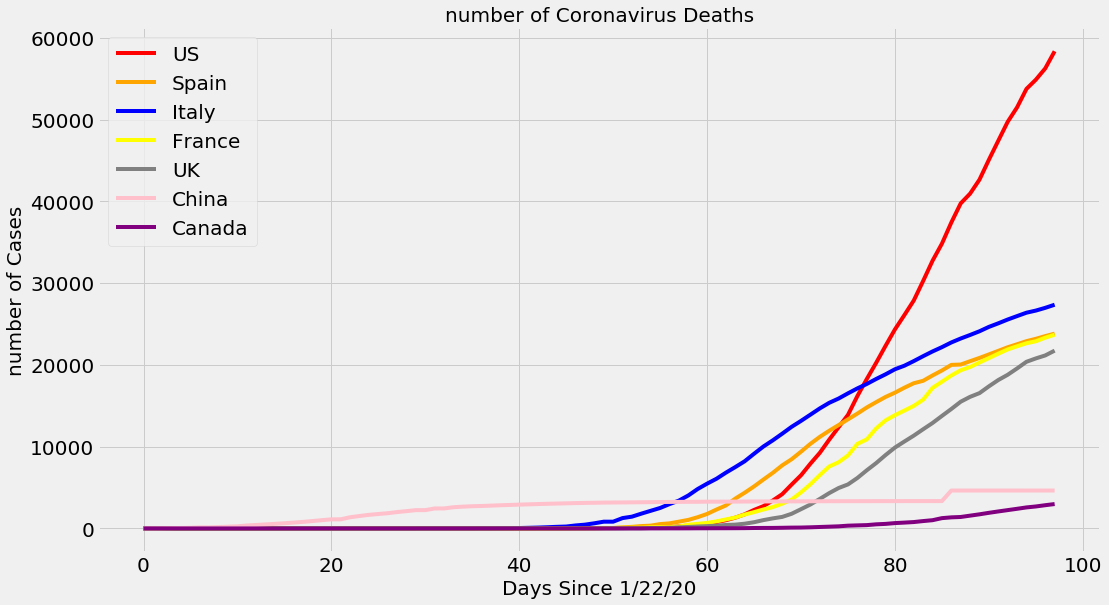

In [197]:
plt.figure(figsize=(16, 9))
plt.plot(dates, US_death,color = "red")
plt.plot(dates, Spain_death,color = "orange")
plt.plot(dates, Italy_death,color = "blue")
plt.plot(dates, France_death,color = "yellow")
plt.plot(dates, UK_death,color = "gray")
plt.plot(dates, China_death,color = "pink")
plt.plot(dates, Canada_death,color = "purple")

plt.title('number of Coronavirus Deaths', size=20)
plt.xlabel('Days Since 1/22/20', size=20)
plt.ylabel('number of Cases', size=20)
plt.legend(['US','Spain', 'Italy', 'France', 'UK','China','Canada'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

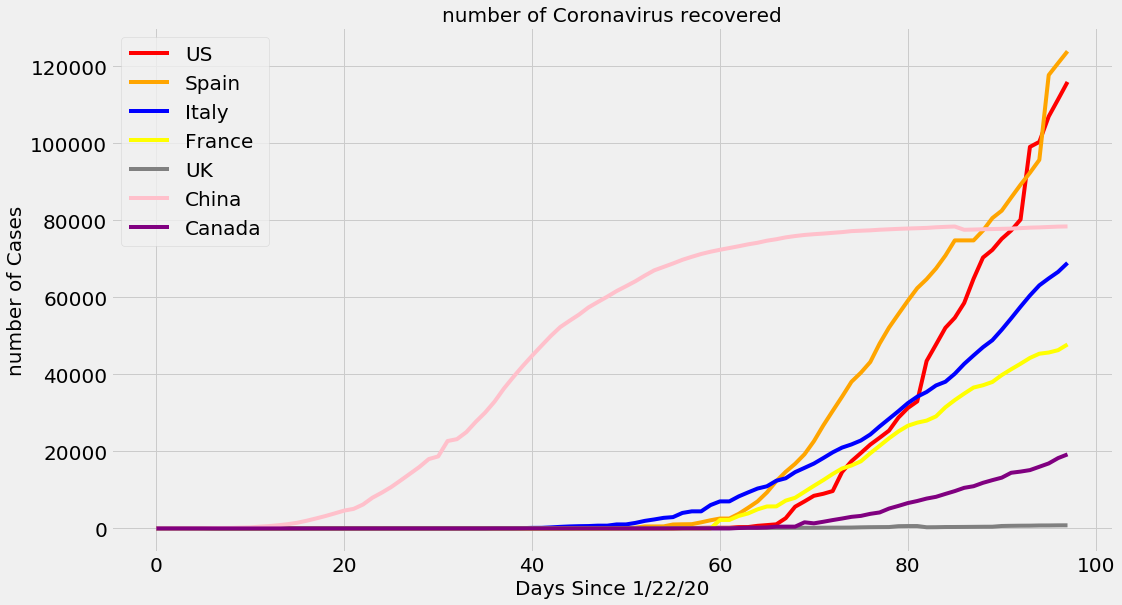

In [198]:
plt.figure(figsize=(16, 9))
plt.plot(dates, US_recovered,color = "red")
plt.plot(dates, Spain_recovered,color = "orange")
plt.plot(dates, Italy_recovered,color = "blue")
plt.plot(dates, France_recovered,color = "yellow")
plt.plot(dates, UK_recovered,color = "gray")
plt.plot(dates, China_recovered,color = "pink")
plt.plot(dates, Canada_recovered,color = "purple")

plt.title('number of Coronavirus recovered', size=20)
plt.xlabel('Days Since 1/22/20', size=20)
plt.ylabel('number of Cases', size=20)
plt.legend(['US','Spain', 'Italy', 'France', 'UK','China','Canada'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [200]:
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(dates_since_1_22, \
                                                                US_confirme,test_size=.3, \
                                                                shuffle=False)
X_train_cn, X_test_cn, y_train_cn, y_test_cn = train_test_split(dates_since_1_22, \
                                                                China_confirme,test_size=.3, \
                                                                shuffle=False)
X_train_ca, X_test_ca, y_train_ca, y_test_ca = train_test_split(dates_since_1_22, \
                                                                Canada_confirme,test_size=.3, \
                                                                shuffle=False)

In [210]:
svr_us = SVR(shrinking=True, kernel='poly', gamma=.01, epsilon=.1, degree=4, C=.1)
svr_us.fit(X_train_us, y_train_us)
svr_us_pred = svr_us.predict(pred_future)

svr_cn = SVR(shrinking=True, kernel='poly', gamma=.01, epsilon=.1, degree=4, C=.1)
svr_cn.fit(X_train_cn, y_train_cn)
svr_cn_pred = svr_cn.predict(pred_future)
ridge_cn = Ridge(alpha=.1)
ridge.fit(X_train_cn, y_train_cn)
ridge_cn_pred = ridge.predict(pred_future)

svr_ca = SVR(shrinking=True, kernel='poly', gamma=.01, epsilon=.1, degree=4, C=.1)
svr_ca.fit(X_train_ca, y_train_ca)
svr_ca_pred = svr_us.predict(pred_future)

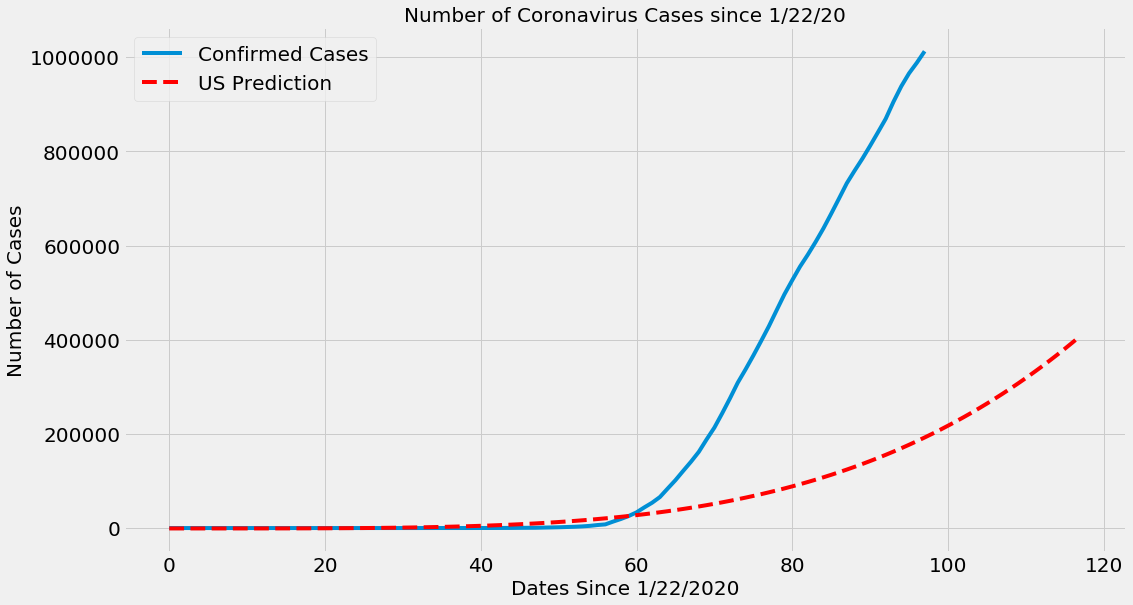

In [215]:
show_predict(dates_since_1_22, US_confirme, svr_us_pred, 'US Prediction', 'red')

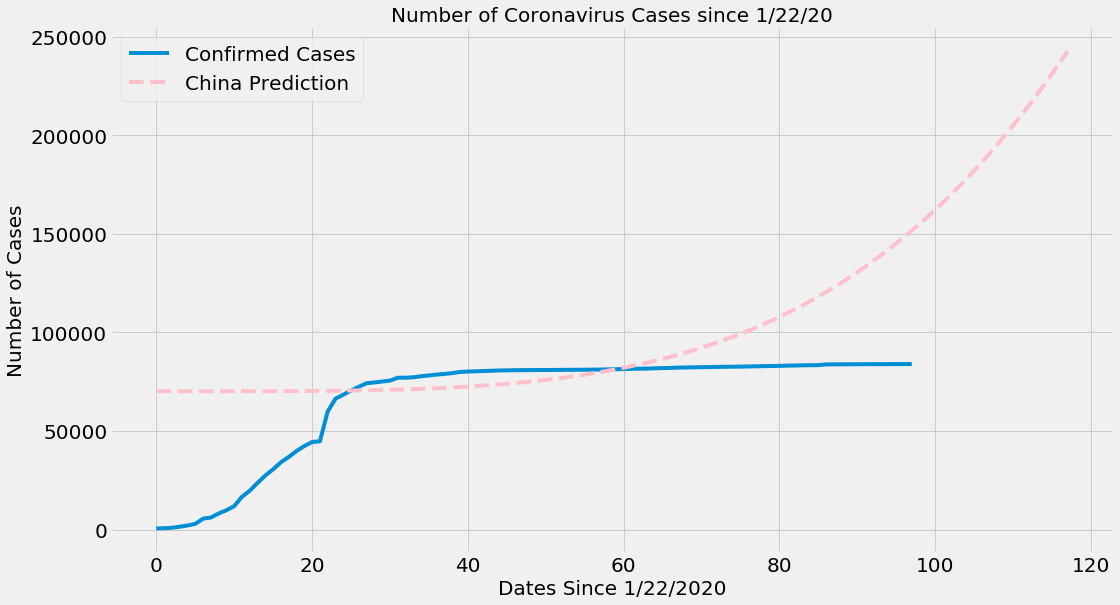

In [216]:
show_predict(dates_since_1_22, China_confirme, svr_cn_pred, 'China Prediction', 'pink')

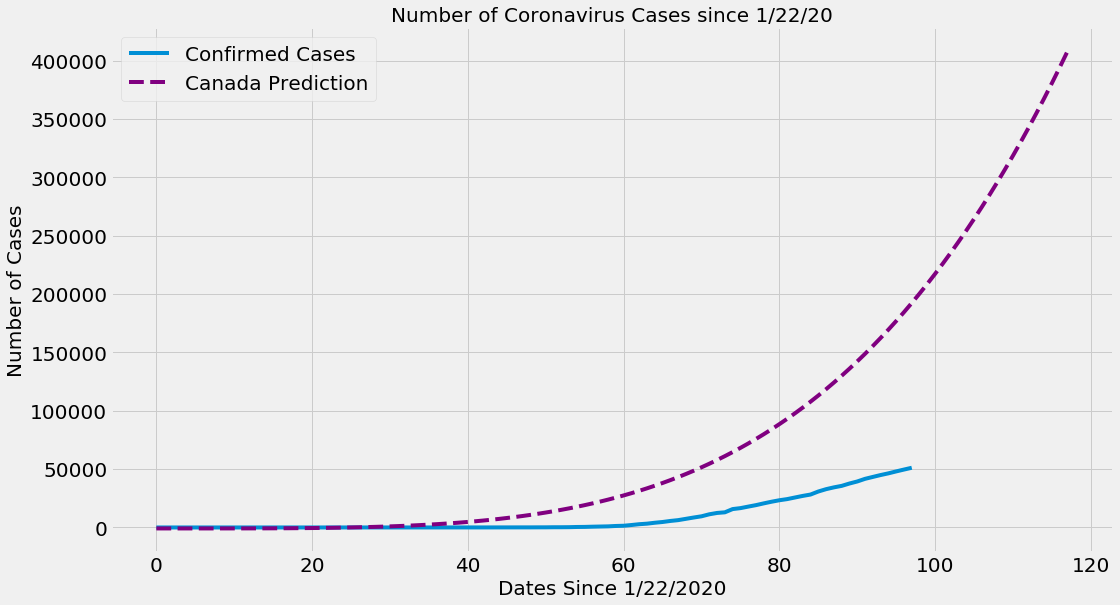

In [217]:
show_predict(dates_since_1_22, Canada_confirme, svr_ca_pred, 'Canada Prediction', 'purple')